In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk
from sklearn.model_selection import train_test_split
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=09e44d09cc6538451effed71e8be93a403e4173683f5cbebd0369b74e85c2c0b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# 데이터 정리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0
)

In [ ]:
forest=RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("Training Accuracy: {:.3f}".format(forest.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(forest.score(X_test,y_test)))

Training Accuracy: 0.998
Test Accuracy: 0.944


In [ ]:
def feature_importance(model,dataset):
  d={}
  for i,x in zip(dataset.feature_names, model.feature_importances_):
       d[i]=x
  d=sorted(d.items(), key=lambda x: x[1],reverse=True)
  fi=pd.DataFrame(d,index=[1])
  return fi

def zoomin_tree(model):
  print("Tree의 leaves 개수 :",model.get_n_leaves())
  print("Tree의 depth : ",model.get_depth())
  print("Tree의 parameter 설정 :",model.get_params)
 
def plot_feature_importances(model):
  n_features=cancer.data.shape[1]
  plt.barh(np.arange(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature Importances",color='white',fontsize=12)
  plt.ylabel("Features",color='white',fontsize=12)
  plt.ylim(-1,n_features)
  plt.xticks(color='white',fontsize=12)
  plt.yticks(color='white',fontsize=12)

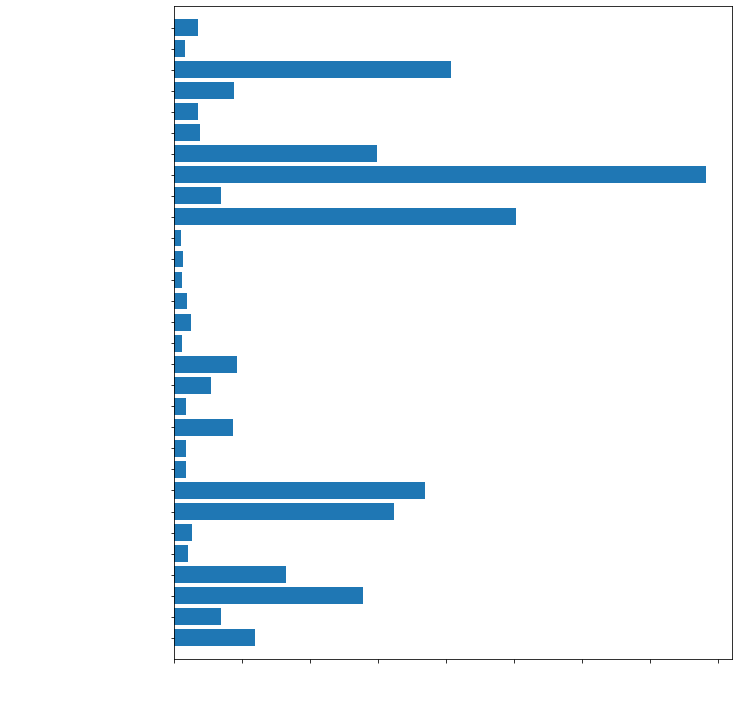

In [ ]:
plt.figure(figsize=(10,12))
plot_feature_importances(forest)

In [ ]:
d={}
for i,x in zip(cancer.feature_names, forest.feature_importances_):
    d[i]=x

feat_importance=sorted(d.items(), key=lambda x: x[1],reverse=True)
print(feat_importance[:10])

[('worst perimeter', 0.19536571358788418), ('worst radius', 0.12542245741619026), ('worst concave points', 0.10149821063924269), ('mean concave points', 0.09200665538631277), ('mean concavity', 0.08056202315006647), ('worst area', 0.07437879680958659), ('mean perimeter', 0.06929807191007652), ('mean area', 0.041129950951144224), ('mean radius', 0.0296912227784509), ('area error', 0.023037519265705315)]


# Max_Features 지정: sqrt(n_features)

In [ ]:
import math
from math import sqrt
sqrt_forest=RandomForestClassifier(n_estimators=100, random_state=0,max_features=int(math.sqrt(len(forest.feature_importances_))))
sqrt_forest.fit(X_train,y_train)

forest_3=RandomForestClassifier(n_estimators=100, random_state=0,max_features=3)
forest_3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("Training Accuracy: {:.3f}".format(sqrt_forest.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(sqrt_forest.score(X_test,y_test)))

print("Training Accuracy: {:.3f}".format(forest_3.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(forest_3.score(X_test,y_test)))


Training Accuracy: 0.998
Test Accuracy: 0.944
Training Accuracy: 0.998
Test Accuracy: 0.944


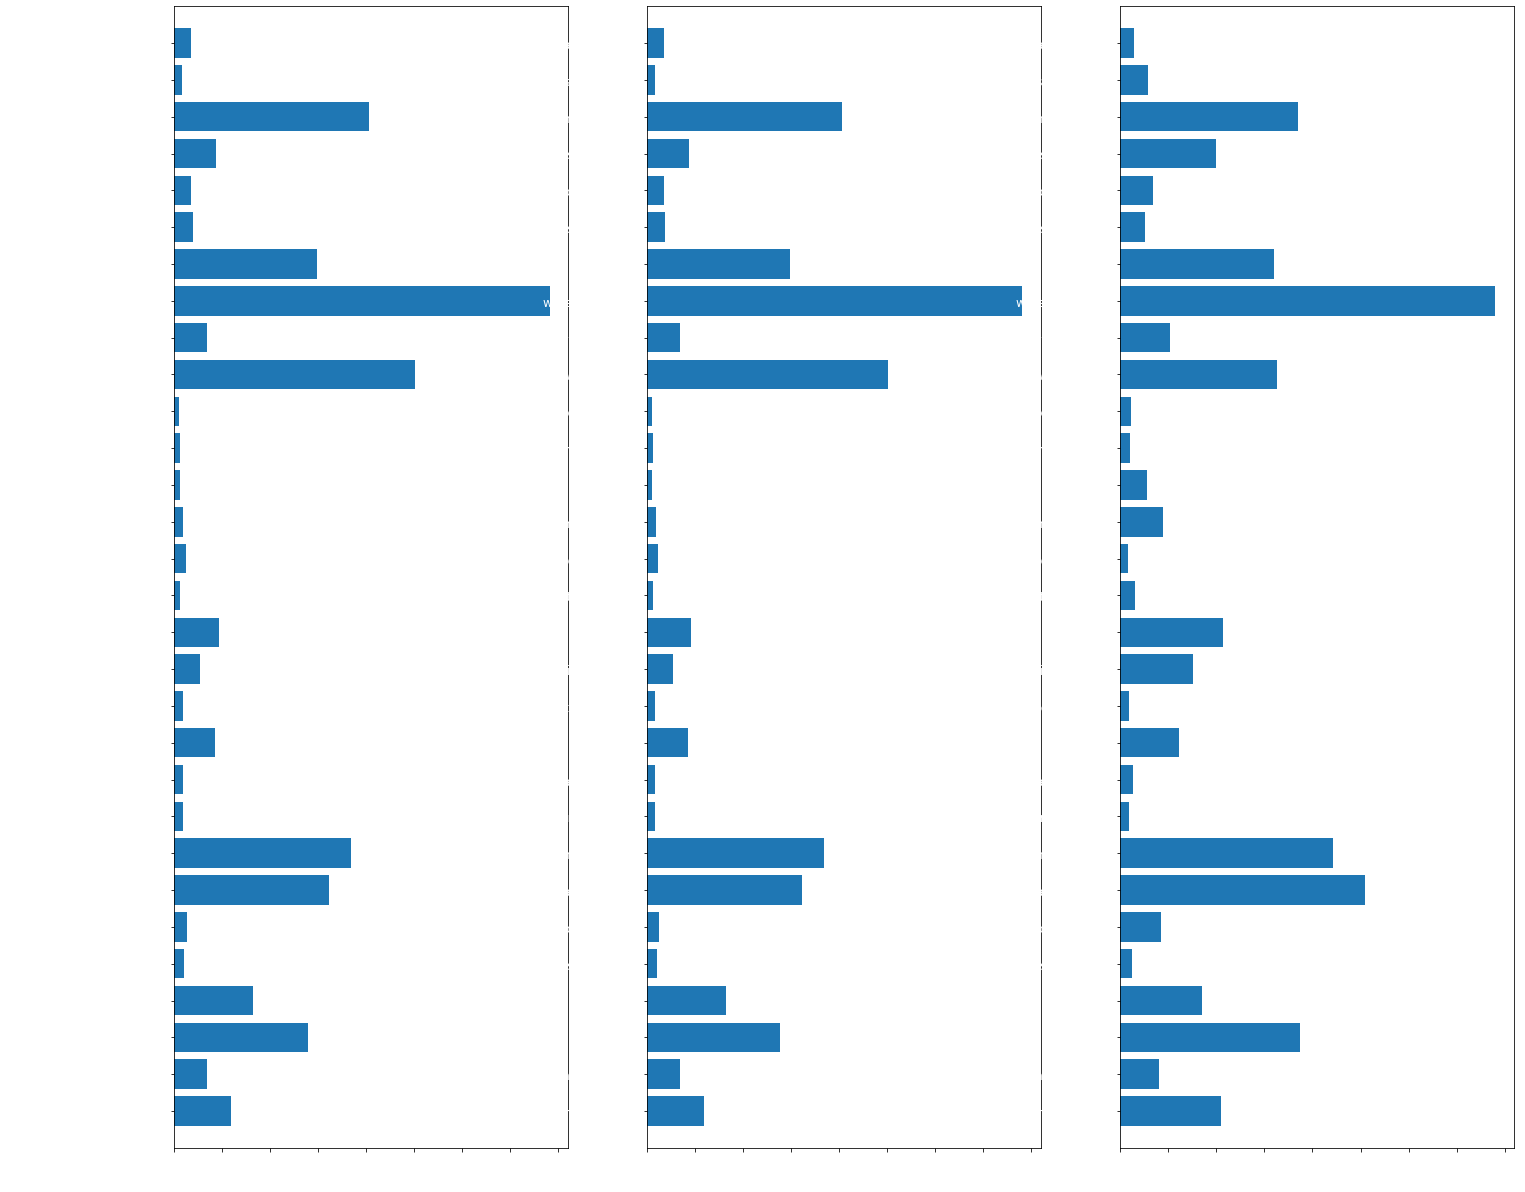

In [ ]:
plt.figure(figsize=(24,21))
plt.subplot(1,3,1)
plot_feature_importances(forest)
plt.subplot(1,3,2)
plot_feature_importances(sqrt_forest)
plt.subplot(1,3,3)
plot_feature_importances(forest_3)


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0
)

In [ ]:
#def GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
#                               n_estimators=100, subsample=1.0, criterion='friedman_mse', 
#                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                               max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
#                               init=None, random_state=None, max_features=None, verbose=0, 
#                               max_leaf_nodes=None, warm_start=False, presort='deprecated', 
#                               validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
gbrt=GradientBoostingClassifier(random_state=0,n_iter_no_change=10)
gbrt.fit(X_train,y_train)
print(gbrt.get_params())
print("Training Accuracy:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Accuracy:{:.3f}".format(gbrt.score(X_test,y_test)))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': 10, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Accuracy:0.995
Test Accuracy:0.958


In [ ]:
gbrt=GradientBoostingClassifier(random_state=0,n_iter_no_change=75)
gbrt.fit(X_train,y_train)
print(gbrt.get_params())
print("Training Accuracy:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Test Accuracy:{:.3f}".format(gbrt.score(X_test,y_test)))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': 75, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Accuracy:0.995
Test Accuracy:0.951


In [ ]:
n_estimators=np.arange(100,1000+100,100)
learn_rate=np.arange(0.1,1+0.1,0.1)
max_depth=np.arange(1,10+1,1)

In [ ]:
#트리 개수에 따른 결과
Training_acc=[]
Test_acc=[]

for i in n_estimators:
  clf=GradientBoostingClassifier(random_state=0, learning_rate=0.01,n_estimators=i,max_features=int(math.sqrt(len(cancer.data[1]))))
  clf.fit(X_train,y_train)
  Training_acc.append(clf.score(X_train,y_train))
  Test_acc.append(clf.score(X_test,y_test))

print(Training_acc)
print(Test_acc)

[0.9906103286384976, 0.9976525821596244, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9440559440559441, 0.9440559440559441, 0.9370629370629371, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958]


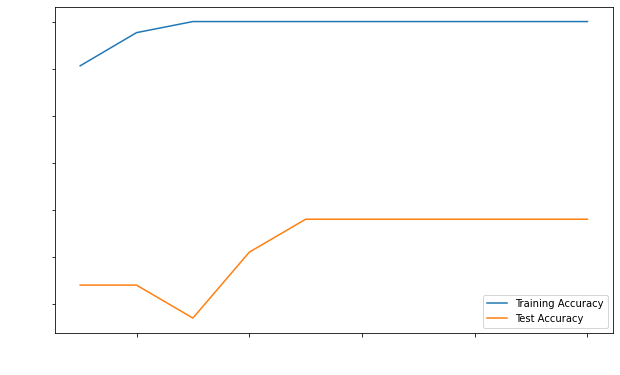

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators, Training_acc, label="Training Accuracy")
plt.plot(n_estimators, Test_acc, label="Test Accuracy")
plt.ylabel("Accuracy",color='white')
plt.xlabel("n_estimators",color='white')
plt.xticks(fontsize=12,color='white')
plt.yticks(fontsize=12,color='white')
plt.legend()

plt.show()

In [ ]:
for i in range(len(n_estimators)):
  
  if(i<=2):
    continue
  
  else:
    if(Test_acc[i]==Test_acc[i+1]):
      print(n_estimators[i],Test_acc[i])
      print(n_estimators[i+1],Test_acc[i+1])
      break


500 0.958041958041958
600 0.958041958041958


In [ ]:
Training_acc=[]
Test_acc=[]

for i in learn_rate:
  clf=GradientBoostingClassifier(random_state=0, learning_rate=i,n_estimators=100,max_features=int(math.sqrt(len(cancer.data[1]))))
  clf.fit(X_train,y_train)
  Training_acc.append(clf.score(X_train,y_train))
  Test_acc.append(clf.score(X_test,y_test))

print(Training_acc)
print(Test_acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.958041958041958, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.958041958041958, 0.9440559440559441, 0.958041958041958, 0.965034965034965, 0.951048951048951, 0.951048951048951]


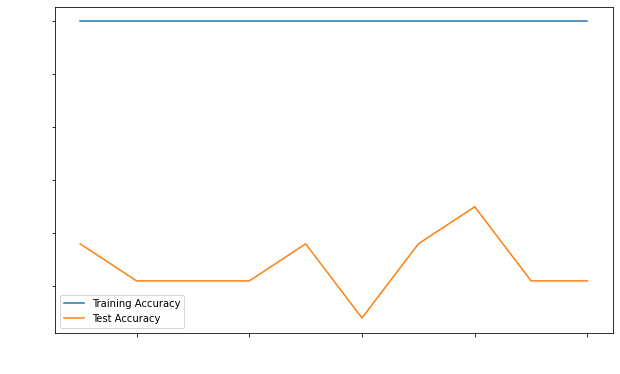

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(learn_rate, Training_acc, label="Training Accuracy")
plt.plot(learn_rate, Test_acc, label="Test Accuracy")
plt.ylabel("Accuracy",color='white')
plt.xlabel("Learning rate",color='white')
plt.xticks(fontsize=12,color='white')
plt.yticks(fontsize=12,color='white')
plt.legend()

plt.show()

In [ ]:
Training_acc=[]
Test_acc=[]

for i in max_depth:
  clf=GradientBoostingClassifier(random_state=0, learning_rate=0.1,n_estimators=100,max_depth=i)
  clf.fit(X_train,y_train)
  Training_acc.append(clf.score(X_train,y_train))
  Test_acc.append(clf.score(X_test,y_test))

print(Training_acc)
print(Test_acc)

[0.9953051643192489, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.965034965034965, 0.9370629370629371, 0.958041958041958, 0.9440559440559441, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231]


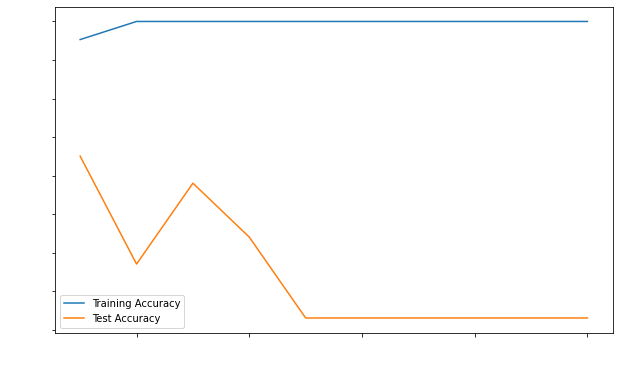

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, Training_acc, label="Training Accuracy")
plt.plot(max_depth, Test_acc, label="Test Accuracy")
plt.ylabel("Accuracy",color='white')
plt.xlabel("Max Depth",color='white')
plt.xticks(fontsize=12,color='white')
plt.yticks(fontsize=12,color='white')
plt.legend()

plt.show()

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.8, 'loss': 'exponential', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


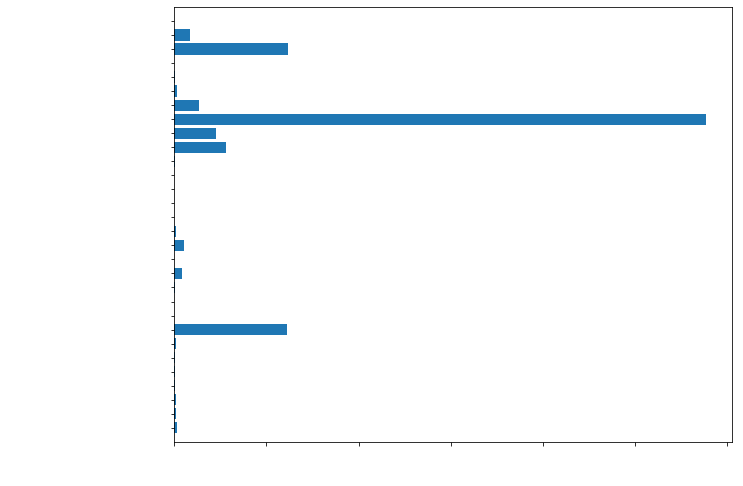

In [ ]:
gbrt_optimal=GradientBoostingClassifier(loss='exponential',learning_rate=0.8,n_estimators=500)
gbrt_optimal.fit(X_train,y_train)
print(gbrt_optimal.get_params())
plt.figure(figsize=(10,8))
plot_feature_importances(gbrt_optimal)

# XGBoosting

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[50  3]
 [ 2 88]]

정확도: 0.9650
정밀도: 0.9670
재현율: 0.9778
F1: 0.9724
AUC: 0.9606


In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는
# binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

# 아래 예제에서는 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용했지만, 
# 바람직하진 않습니다.
# 테스트 데이터 세트는 학습에 완전히 알려지지 않은 데이터 세트를 사용해야 합니다.
# 평가에 테스트 데이터 세트를 사용하면 학습시에 미리 참고가 되어 
# 과적합할 수 있기 때문입니다.

xgb_early = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_early.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="logloss", eval_set = evals, verbose=True)
preds_early = xgb_early.predict(X_test)

[0]	validation_0-logloss:0.618659
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.5527
[2]	validation_0-logloss:0.501015
[3]	validation_0-logloss:0.459627
[4]	validation_0-logloss:0.424374
[5]	validation_0-logloss:0.388941
[6]	validation_0-logloss:0.35796
[7]	validation_0-logloss:0.335656
[8]	validation_0-logloss:0.312168
[9]	validation_0-logloss:0.29248
[10]	validation_0-logloss:0.278442
[11]	validation_0-logloss:0.262353
[12]	validation_0-logloss:0.248206
[13]	validation_0-logloss:0.239223
[14]	validation_0-logloss:0.227359
[15]	validation_0-logloss:0.217469
[16]	validation_0-logloss:0.209173
[17]	validation_0-logloss:0.203611
[18]	validation_0-logloss:0.197384
[19]	validation_0-logloss:0.191352
[20]	validation_0-logloss:0.188657
[21]	validation_0-logloss:0.185621
[22]	validation_0-logloss:0.181609
[23]	validation_0-logloss:0.17988
[24]	validation_0-logloss:0.176785
[25]	validation_0-logloss:0.17351
[26]	validation_0-logloss:0.170994
[2

In [ ]:
get_clf_eval(y_test, preds_early)

오차행렬:
 [[50  3]
 [ 2 88]]

정확도: 0.9650
정밀도: 0.9670
재현율: 0.9778
F1: 0.9724
AUC: 0.9606
